<a href="https://colab.research.google.com/github/HarikrishnanK9/Stock_Market/blob/main/Stock_Prediction_TATA_ELXSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.preprocessing .sequence import TimeseriesGenerator


In [2]:
df=pd.read_csv("/content/TATAELXSI.NS.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-04,6448.750000,6478.450195,6352.000000,6369.549805,6320.004395,122264
1,2023-01-05,6384.950195,6396.850098,6270.000000,6287.450195,6238.543457,125426
2,2023-01-06,6315.000000,6315.000000,6185.000000,6193.899902,6145.720703,117274
3,2023-01-09,6270.000000,6323.200195,6206.000000,6232.000000,6183.524414,134158
4,2023-01-10,6232.000000,6235.000000,6165.000000,6199.799805,6151.574707,101262
...,...,...,...,...,...,...,...
242,2023-12-29,8799.150391,8799.150391,8701.500000,8753.450195,8753.450195,67924
243,2024-01-01,8793.000000,8793.000000,8710.000000,8744.200195,8744.200195,34849
244,2024-01-02,8740.000000,8784.599609,8609.000000,8711.450195,8711.450195,47188
245,2024-01-03,8722.950195,8728.799805,8600.000000,8607.549805,8607.549805,53427


In [3]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(title='Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()


In [4]:
fig = go.Figure()
candlestick_trace = go.Candlestick(x=df['Date'],
                                   open=df['Open'],
                                   high=df['High'],
                                   low=df['Low'],
                                   close=df['Close'],
                                   increasing_line_color='green',  # Color for increasing candles
                                   decreasing_line_color='red',    # Color for decreasing candles
                                   showlegend=False,               # Hide legend for this trace
                                   name='Candlesticks')            # Name for the legend
fig.add_trace(candlestick_trace)

moving_average_trace = go.Scatter(x=df['Date'], y=df['Close'].rolling(window=20).mean(),
                                  mode='lines', name='20-day Moving Average', line=dict(color='blue'))
fig.add_trace(moving_average_trace)

fig.update_layout(title='Candlestick Chart with Trace Options',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

fig.show()


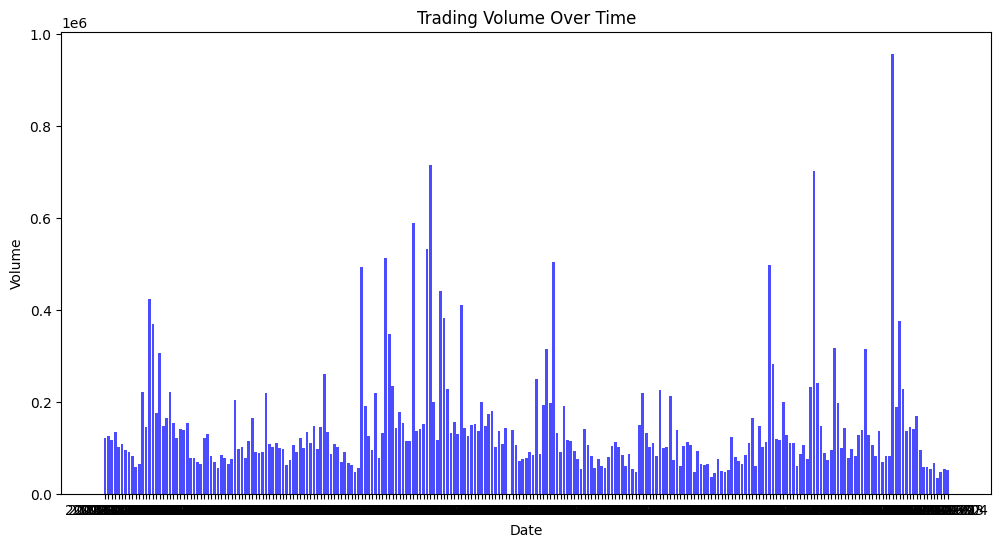

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Volume'], color='blue', alpha=0.7)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


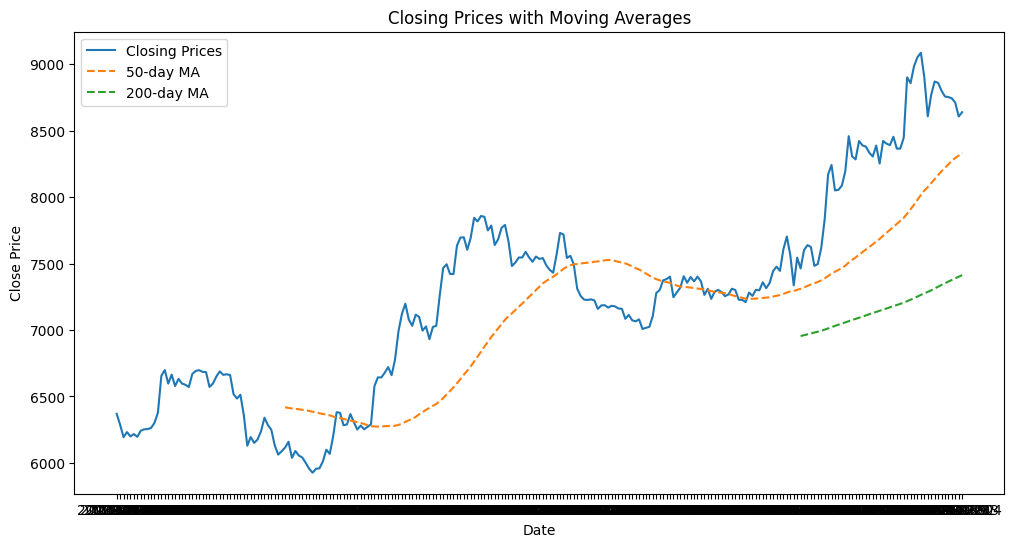

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Prices')
plt.plot(df['Date'], df['Close'].rolling(window=50).mean(), label='50-day MA', linestyle='--')
plt.plot(df['Date'], df['Close'].rolling(window=200).mean(), label='200-day MA', linestyle='--')
plt.title('Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [7]:
fig = go.Figure()
# Closing Prices trace
closing_prices_trace = go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Closing Prices')
fig.add_trace(closing_prices_trace)
# 50-day Moving Average trace
ma_50_trace = go.Scatter(x=df['Date'], y=df['Close'].rolling(window=50).mean(),
                         mode='lines', name='50-day Moving Average', line=dict(dash='dash'))
fig.add_trace(ma_50_trace)
# 200-day Moving Average trace
ma_200_trace = go.Scatter(x=df['Date'], y=df['Close'].rolling(window=200).mean(),
                          mode='lines', name='200-day Moving Average', line=dict(dash='dash'))
fig.add_trace(ma_200_trace)
fig.update_layout(title='Closing Prices with Moving Averages',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  legend=dict(x=0.7, y=0.95))
fig.show()

<Figure size 1200x600 with 0 Axes>

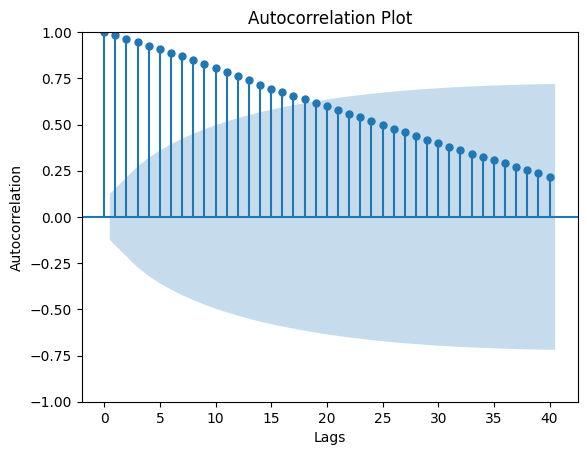

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(df['Close'], lags=40)
plt.title('Autocorrelation Plot')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()


In [9]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(df['Date'],inplace=True)

In [10]:
df=df.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

In [11]:
tracel = go.Scatter(
    x=df['Date'],
    y=df['Close'],
    mode='lines',
    name='Date'
)

layout=go.Layout(
    title='KPIT:Date X Close',
    xaxis={'title':'Date'},
    yaxis={'title':'Close'}
)

fig = go.Figure(data=[tracel],layout=layout)
fig.show()

In [12]:
close_data = df['Close'].values

In [13]:
close_data

array([6369.549805, 6287.450195, 6193.899902, 6232.      , 6199.799805,
       6216.799805, 6196.649902, 6242.25    , 6252.850098, 6254.75    ,
       6262.899902, 6301.649902, 6378.299805, 6655.450195, 6698.850098,
       6597.200195, 6664.350098, 6578.149902, 6632.700195, 6597.149902,
       6588.25    , 6571.149902, 6669.200195, 6692.5     , 6697.850098,
       6685.149902, 6683.649902, 6571.950195, 6596.799805, 6649.950195,
       6688.75    , 6662.899902, 6666.899902, 6661.75    , 6517.950195,
       6484.5     , 6512.850098, 6358.700195, 6129.25    , 6194.600098,
       6150.549805, 6176.450195, 6237.649902, 6340.200195, 6284.549805,
       6249.299805, 6130.950195, 6062.5     , 6088.049805, 6115.100098,
       6159.      , 6037.950195, 6089.700195, 6055.399902, 6040.850098,
       6000.700195, 5956.399902, 5926.149902, 5956.049805, 5959.100098,
       6011.299805, 6099.200195, 6068.149902, 6201.100098, 6381.299805,
       6376.950195, 6283.5     , 6289.75    , 6367.299805, 6307.

In [14]:
close_data=close_data.reshape(-1,1)
close_data

array([[6369.549805],
       [6287.450195],
       [6193.899902],
       [6232.      ],
       [6199.799805],
       [6216.799805],
       [6196.649902],
       [6242.25    ],
       [6252.850098],
       [6254.75    ],
       [6262.899902],
       [6301.649902],
       [6378.299805],
       [6655.450195],
       [6698.850098],
       [6597.200195],
       [6664.350098],
       [6578.149902],
       [6632.700195],
       [6597.149902],
       [6588.25    ],
       [6571.149902],
       [6669.200195],
       [6692.5     ],
       [6697.850098],
       [6685.149902],
       [6683.649902],
       [6571.950195],
       [6596.799805],
       [6649.950195],
       [6688.75    ],
       [6662.899902],
       [6666.899902],
       [6661.75    ],
       [6517.950195],
       [6484.5     ],
       [6512.850098],
       [6358.700195],
       [6129.25    ],
       [6194.600098],
       [6150.549805],
       [6176.450195],
       [6237.649902],
       [6340.200195],
       [6284.549805],
       [62

In [15]:
split_percentage=0.80
split=int(split_percentage * len(close_data))
split

197

In [16]:
close_train = close_data[:split]
close_test = close_data[split:]

In [17]:
print(len(close_train))
print(len(close_test))

197
50


In [18]:
date_train = df['Date'][:split]
date_test = df['Date'][split:]

In [19]:
print(len(date_train))
print(len(date_test))

197
50


In [21]:
look_back=15
train_generator = TimeseriesGenerator(close_train,close_train,length=look_back,batch_size=30)

In [22]:
test_generator = TimeseriesGenerator(close_test,close_test,length=look_back,batch_size=5)

In [23]:
model = Sequential()
model.add(
    LSTM(10, activation='relu', input_shape=(look_back, 1))
)
model.add(
    Dense(1)
)


In [24]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='mse')

In [25]:
model.fit(train_generator,epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 14ms/step - loss: 37476672.0000
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 36986440.0000
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 36429508.0000
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 35930492.0000
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 35389444.0000
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 34844488.0000
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 34316264.0000
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 33744436.0000
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 33173858.0000
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 32532568.0000
Epoch 11/100
7/7 [==============================] - 0s 8ms/step - loss: 31902624.0000
Epoch 12/100
7/7 [==============================] - 0s 7ms/st

In [26]:
model.save('elxsi.keras')

In [27]:
prediction = model.predict_generator(test_generator)

<ipython-input-27-342c80f366ab>:1: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



In [28]:
prediction

array([[8089.233 ],
       [8172.835 ],
       [8389.1   ],
       [8335.006 ],
       [8304.488 ],
       [8397.951 ],
       [8398.32  ],
       [8391.562 ],
       [8356.164 ],
       [8325.911 ],
       [8378.226 ],
       [8292.641 ],
       [8394.785 ],
       [8407.083 ],
       [8402.5205],
       [8447.105 ],
       [8393.671 ],
       [8379.684 ],
       [8434.915 ],
       [8783.869 ],
       [8845.475 ],
       [8955.011 ],
       [9034.12  ],
       [9080.015 ],
       [8955.419 ],
       [8707.663 ],
       [8760.346 ],
       [8847.916 ],
       [8863.727 ],
       [8824.825 ],
       [8782.487 ],
       [8767.873 ],
       [8757.183 ],
       [8730.306 ],
       [8646.918 ]], dtype=float32)

In [29]:
close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction=prediction.flatten()

In [30]:
prediction

array([8089.233 , 8172.835 , 8389.1   , 8335.006 , 8304.488 , 8397.951 ,
       8398.32  , 8391.562 , 8356.164 , 8325.911 , 8378.226 , 8292.641 ,
       8394.785 , 8407.083 , 8402.5205, 8447.105 , 8393.671 , 8379.684 ,
       8434.915 , 8783.869 , 8845.475 , 8955.011 , 9034.12  , 9080.015 ,
       8955.419 , 8707.663 , 8760.346 , 8847.916 , 8863.727 , 8824.825 ,
       8782.487 , 8767.873 , 8757.183 , 8730.306 , 8646.918 ],
      dtype=float32)

In [32]:
tracel2 = go.Scatter(
    x=date_train,
    y=close_train,
    mode='lines',
    name='Date'
)

tracel3 = go.Scatter(
    x=date_test,
    y=close_test,
    mode='lines',
    name='test data'
)

tracel4 = go.Scatter(
    x=date_test,
    y=prediction,
    mode = 'lines',
    name='prediction'
)
layout = go.Layout(
    title='TATA ELXSI Stock',
    xaxis={'title':'Date'},
    yaxis={'title':'Close'}
)

fig = go.Figure(data=[tracel2,tracel3,tracel4],layout=layout)
fig.show()